# RIT - REST API Examples using Python
## Jupyter Notebook Edition

## Introduction

This tutorial is designed for those who are interested in using an Application Programming Interface (API) to create their own Decision Support templates or algorithms for RIT Decision Cases. Esperically, for this tutorial, students are not expected to have any prior knowledge or experience in programming, and this tutorial provides examples using RIT API commands that students can easily follow.

After following this tutorial, students may try to follow the RIT API User Guide to complete a python algorithm for ALGO1, or try to work on building an algorithm for other cases.

In addition, this version of the tutorial is specifically tailored for Jupyter Notebook for easier access of codes and demonstration. If you consider yourself as a novice user who is starting to use Python, this Jupyter Notebook will provide you with more guidance and support.

Before we start, please go visit the RIT REST API Interactive Documentation link and take a quick look until the "Additional Notes" section from this webpage: http://rit.306w.ca/RIT-REST-API/1.0.2/ Then, please make sure that your RIT Client is connected to a case in order to make sure that we can run interactive codes and check outcomes on a real-time basis. Pleas also note that some commands may not work depending on the case setup (i.e. if the API order submission is not allowed or if there is no asset enabled in the case, then the corresponding commands will not work).

## Basic Setup

### Session Request

RIT uses REpresentational State Transfer (REST) API which is one of the most popular architectural style of APIs for web-based communications. This particular API carries a simple set of guidelines that are logical and straight-forward to use. In order to interact with RIT data via REST API, it is important to first create a <code>request</code> in Python to establish a connection between the code (your algorithm) and the RIT Client.

Generally, a <code>request</code> requires the use of the following inputs/arguments:
- Endpoint: it's usually a URL that you're interacting with. It will be provided to you by default via RIT.
- Headers: different types of data that may need to be included with the request. It's usually authorization information such as an authentication token
- Method: different approaches of interacting with endpoint data. For example, you may use GET/POST/DELETE methods.
- Data: different values/keys that you may need to submit depending on the method type.

First, let's import the <code>Requests</code> module.

In [38]:
import requests

Since we will establish a connection to RIT Client and keep interacting with it by pulling and/or submitting data, we will need to create a <code>session object</code> which allows us to persist certain parameters such as authentication. Once we create a <code>session object</code>, we can simply keep using it by changing the endpoint and method later on.

For now, let's set up a simple <code>session object</code> as <code>s</code>. You will also note that we are using <code>.session()</code> class within the <code>requests</code> module.

In [39]:
s = requests.session()

### API KEY

The next step is to connect the Jupyter Notebook to your RIT Client. First, you'll need to log into your RIT Client, and go to the bottom-right corner to click on the <code>API</code> icon. Then, you'll see the following pop-up message that allows you to view/change the REST API information. You will need to use the API Key to connect to RIT Client, and since it is randomly generated and you are able to change it, we recommend that you change it to something easier to work with. From the example below, the API Key is changed to 'rotman'.

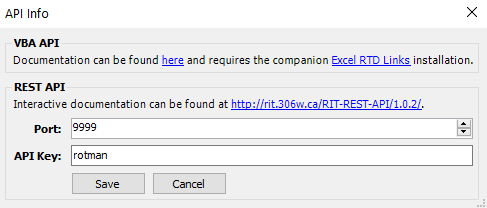

Once your <code>API KEY</code> is set, you may write the following command to set up the <code>API KEY</code> in Jupyter Notebook for connection.

In [40]:
API_KEY = {'X-API-Key': 'rotman'}

Then, we will now update the <code>header</code> for the <code>session</code> above to establish a connection.

In [41]:
s.headers.update(API_KEY)

Now, let's start trying out the basic RIT REST API commands.

## Getting General Information

When you create a <code>request</code> to interact with RIT Client via REST API, it returns a <code>response object</code>. By default, the returned value will always be <code>HTTP code</code>, and you will need to specify the response type to <code>JSON</code> if you want to see the json-encoded content of a response via RIT REST API.

Let's take a look at the examples below.

### GET/case

In [18]:
resp = s.get('http://localhost:9999/v1/case')

We first set <code>resp</code> as a <code>session request</code> (as denoted by <code>s</code>). Then we used the <code>GET</code> method to specifically retrieve information about the current case by adding <code>/case</code> in the end. In order to check the response (i.e. returned values), we will simply query <code>resp</code> as shown below.

In [19]:
resp

<Response [200]>

If the connection and the request are made successfully, then you should see <code>Response [200]</code> as a returned value. If you receive <code>Response [401]</code>, it means that your connection is not properly set up. Please make sure that your RIT Client is logged in, and that your <code>API KEY</code> is correctly set up as shown in the above step.

Assuming that you received the proper response code <code>200</code>, let's try to get the content of the response in <code>JSON</code> by simply adding <code>.JSON</code> in the end.

In [20]:
resp.json()

{'name': 'RIT REST API Example Demo Case',
 'period': 1,
 'tick': 21,
 'ticks_per_period': 300,
 'total_periods': 1,
 'status': 'PAUSED',
 'is_enforce_trading_limits': True}

Now you will see that the complete content is displayed in the <code>JSON</code> format. If you would like to pick a particular data point, you can try using the square brackets and the data point names. For example, if you want to pick up the current <code>tick</code> of the case, you may use the following:

In [21]:
info = resp.json()
tick = info['tick']
tick

21

First, we created <code>info</code> as a variable that contains the <code>JSON</code> response. Then, we assigned  <code>info['tick']</code> from the response to <code>tick</code>. Now, <code>tick</code> will contain the current tick of the case whenever it's queried as we keep building our code.

Similarly, you can use the following GET methods to retrieve the relevant information.

### GET/trader

From now on, we will keep using <code>resp</code> as a starting point for each data point. Please note that it is important to run these codes sequentially as <code>resp</code> will be repeated for each data point for this tutorial. It is intended to use the same <code>resp</code> variable as it will be used separately within different helper methods later.

In [44]:
resp = s.get('http://localhost:9999/v1/trader')
trader = resp.json()
trader

{'trader_id': '1', 'first_name': '1', 'last_name': '1', 'nlv': 0.0}

### GET/limits

In [58]:
resp = s.get('http://localhost:9999/v1/limits')
limits = resp.json()
limits

[{'name': 'LIMIT-STOCK',
  'gross': 0.0,
  'net': 0.0,
  'gross_limit': 250000,
  'net_limit': 100000,
  'gross_fine': 1.0,
  'net_fine': 1.0},
 {'name': 'CRUDE',
  'gross': 0.0,
  'net': 0.0,
  'gross_limit': 500,
  'net_limit': 100,
  'gross_fine': 0.0,
  'net_fine': 0.0},
 {'name': 'PRODUCT',
  'gross': 0.0,
  'net': 0.0,
  'gross_limit': 500,
  'net_limit': 100,
  'gross_fine': 0.0,
  'net_fine': 0.0}]

In this case, you may notice that the response starts with square brackets. This is because the response contains a list (or an array) of objects for each limit category such as <code>LIMIT-STOCK</code>, <code>CRUDE</code>, and <code>PRODUCE</code> in this case.

If you want to grab a particular array, you may use <code>[#]</code> where <code>#</code> refers to the sequence number of the array. For example, if you want to grab the information for <code>LIMIT-STOCK</code> only, then you may use <code>[0]</code> (i.e. an array starts from 0). Combining what we learned above to grab a particular data point, we can do the following to grab 'gross limit' for the <code>LIMIT-STOCK</code> category.

In [66]:
glimit=limits[0]['gross_limit']
glimit

250000

Similarly, if you want to grab a net limit and a gross limit for the <code>LIMIT-STOCK</code> category together, we can try the following:

In [64]:
gnlimit=limits[0]['gross_limit'], limits[0]['net_limit']
gnlimit

(250000, 100000)

### GET/news

You can also retrieve news items and related information using RIT REST API.

In [65]:
resp = s.get('http://localhost:9999/v1/news')
news = resp.json()
news

[{'news_id': 0,
  'period': 1,
  'tick': 0,
  'ticker': '',
  'headline': 'Welcome to the RIT REST API example case',
  'body': 'Please note that this case is solely designed for RIT REST API feature testing purpose.'}]

## Securities

In this section, we will try to grab information related to securities available in RIT using the <code>GET</code> method.

### GET/securities

Similarly, we can use the <code>GET/securities</code> method to pull information about securities. For example, if you want to retrieve the list of securities avaialble in the RIT case along with general information such as type, position, cost(VWAP), volume, etc., you can use the <code>GET/securities</code> method as shown below.

In [77]:
resp = s.get('http://localhost:9999/v1/securities')
sec = resp.json()
sec

[{'ticker': 'CRZY',
  'type': 'STOCK',
  'size': 1,
  'position': 100.0,
  'vwap': 9.99,
  'nlv': 995.0,
  'last': 9.99,
  'bid': 9.97,
  'bid_size': 5300.0,
  'ask': 9.99,
  'ask_size': 4300.0,
  'volume': 33300.0,
  'unrealized': -4.0,
  'realized': -2.0,
  'currency': '',
  'total_volume': 33300.0,
  'limits': [{'name': 'LIMIT-STOCK', 'units': 1.0}],
  'interest_rate': 0.0,
  'is_tradeable': True,
  'is_shortable': True,
  'start_period': 1,
  'stop_period': 1,
  'description': 'CRZY Common Shares',
  'unit_multiplier': 1,
  'display_unit': 'Shares',
  'start_price': 10.0,
  'min_price': 5.0,
  'max_price': 20.0,
  'quoted_decimals': 2,
  'trading_fee': 0.02,
  'limit_order_rebate': 0.0,
  'max_trade_size': 25000,
  'required_tickers': None,
  'underlying_tickers': None,
  'bond_coupon': 0.0,
  'interest_payments_per_period': 0,
  'base_security': '',
  'fixing_ticker': None,
  'api_orders_per_second': 20,
  'execution_delay_ms': 0,
  'interest_rate_ticker': None,
  'otc_price_range

The <code>GET/securities</code> method also allows you to retrieve information for a particular security by adding a particular syntax. For example, if you wish to pull the information for <code>CRZY</code>, you will need to add <code>?ticker=CRZY</code> at the end of the <code>GET/securities</code> method as shown below.

In [15]:
resp = s.get('http://localhost:9999/v1/securities?ticker=CRZY')
crzy = resp.json()
crzy

[{'ticker': 'CRZY',
  'type': 'STOCK',
  'size': 1,
  'position': 100.0,
  'vwap': 9.99,
  'nlv': None,
  'last': 0.0,
  'bid': 9.97,
  'bid_size': 5300.0,
  'ask': 9.99,
  'ask_size': 4300.0,
  'volume': 33300.0,
  'unrealized': None,
  'realized': -2.0,
  'currency': '',
  'total_volume': 33300.0,
  'limits': [{'name': 'LIMIT-STOCK', 'units': 1.0}],
  'interest_rate': 0.0,
  'is_tradeable': True,
  'is_shortable': True,
  'start_period': 1,
  'stop_period': 1,
  'description': 'CRZY Common Shares',
  'unit_multiplier': 1,
  'display_unit': 'Shares',
  'start_price': 10.0,
  'min_price': 5.0,
  'max_price': 20.0,
  'quoted_decimals': 2,
  'trading_fee': 0.02,
  'limit_order_rebate': 0.0,
  'max_trade_size': 25000,
  'required_tickers': None,
  'underlying_tickers': None,
  'bond_coupon': 0.0,
  'interest_payments_per_period': 0,
  'base_security': '',
  'fixing_ticker': None,
  'api_orders_per_second': 20,
  'execution_delay_ms': 0,
  'interest_rate_ticker': None,
  'otc_price_range':

Now, in order to make it more dynamic and easier to code, we can use the <code>params</code> keyword argument instead of writing the ticker symbol by hand every time. The <code>params</code> keyword argument allows you to pass particular keys/values as a dictionary of strings.

Note that this is possible since the <code>GET/securities</code> method allows the <code>params</code> keyword argument (i.e. it's programmed into the the <code>GET/securities</code> method which means that it may not work for other methods. Throughout this tutorial, this will be explicitly mentioned if it's available for particular methods).

It is a standard to use the <code>params</code> keyword argument with <code>payload</code> to include the keys/values as shown below. This will come in handy when we build functions in Python later.

In [18]:
payload={'ticker': 'CRZY'}
resp = s.get('http://localhost:9999/v1/securities', params=payload)
sec = resp.json()
sec

[{'ticker': 'CRZY',
  'type': 'STOCK',
  'size': 1,
  'position': 100.0,
  'vwap': 9.99,
  'nlv': None,
  'last': 0.0,
  'bid': 9.97,
  'bid_size': 5300.0,
  'ask': 9.99,
  'ask_size': 4300.0,
  'volume': 33300.0,
  'unrealized': None,
  'realized': -2.0,
  'currency': '',
  'total_volume': 33300.0,
  'limits': [{'name': 'LIMIT-STOCK', 'units': 1.0}],
  'interest_rate': 0.0,
  'is_tradeable': True,
  'is_shortable': True,
  'start_period': 1,
  'stop_period': 1,
  'description': 'CRZY Common Shares',
  'unit_multiplier': 1,
  'display_unit': 'Shares',
  'start_price': 10.0,
  'min_price': 5.0,
  'max_price': 20.0,
  'quoted_decimals': 2,
  'trading_fee': 0.02,
  'limit_order_rebate': 0.0,
  'max_trade_size': 25000,
  'required_tickers': None,
  'underlying_tickers': None,
  'bond_coupon': 0.0,
  'interest_payments_per_period': 0,
  'base_security': '',
  'fixing_ticker': None,
  'api_orders_per_second': 20,
  'execution_delay_ms': 0,
  'interest_rate_ticker': None,
  'otc_price_range':

### GET/securities/book

Similarly, we can use the <code>GET/securities/book</code> method with the <code>params</code> keyword arguement to pull the detailed order book information as shown below. In this case, we can try pulling the order book information for <code>CRZY</code>. Note that <code>limit</code> is an optional parameter that allows us to decide how many orders to show per each side of the book (bid and ask). If this parameter is not set, it will have a default value of 20.

In [11]:
payload={'ticker': 'CRZY', 'limit': 5}
resp = s.get('http://localhost:9999/v1/securities/book', params=payload)
crzybook = resp.json()
crzybook

{'bids': [{'order_id': 399,
   'period': 1,
   'tick': 21,
   'trader_id': 'ANON',
   'ticker': 'CRZY',
   'quantity': 4400.0,
   'price': 9.96,
   'type': 'LIMIT',
   'action': 'BUY',
   'quantity_filled': 0.0,
   'vwap': None,
   'status': 'OPEN'},
  {'order_id': 388,
   'period': 1,
   'tick': 21,
   'trader_id': 'ANON',
   'ticker': 'CRZY',
   'quantity': 4200.0,
   'price': 9.95,
   'type': 'LIMIT',
   'action': 'BUY',
   'quantity_filled': 0.0,
   'vwap': None,
   'status': 'OPEN'},
  {'order_id': 223,
   'period': 1,
   'tick': 9,
   'trader_id': 'ANON',
   'ticker': 'CRZY',
   'quantity': 5700.0,
   'price': 9.92,
   'type': 'LIMIT',
   'action': 'BUY',
   'quantity_filled': 2700.0,
   'vwap': 9.92,
   'status': 'OPEN'},
  {'order_id': 330,
   'period': 1,
   'tick': 17,
   'trader_id': 'ANON',
   'ticker': 'CRZY',
   'quantity': 4700.0,
   'price': 9.92,
   'type': 'LIMIT',
   'action': 'BUY',
   'quantity_filled': 0.0,
   'vwap': None,
   'status': 'OPEN'},
  {'order_id': 210

Now if you want to pull the first orders only (i.e. best bid in the book for <code>CRZY</code>), you may try adding <code>[0]</code> in the end (again, the array starts with 0).

In [11]:
crzybook['bids'][0]

{'order_id': 230,
 'period': 1,
 'tick': 9,
 'trader_id': 'ANON',
 'ticker': 'CRZY',
 'quantity': 5300.0,
 'price': 9.97,
 'type': 'LIMIT',
 'action': 'BUY',
 'quantity_filled': 0.0,
 'vwap': None,
 'status': 'OPEN'}

Moreover, if you're simply puiing the best bid price only, you can add <code>['price']</code> (the square bracket and the data point name) in the end as shown below.

In [14]:
crzybook['bids'][0]['price']

9.97

### GET/securities/history

The <code>GET/securities/history</code> method allows us to pull the historical OHLC (Open, High, Low, and Close) price information for a security. Similarly, we can use the <code>params</code> keyword arguement here as well. Note that <code>ticker</code> is the only required parameter, and <code>period</code> and <code>limit</code> are optional. For example, if we want to retrieve historical OHLC prices for <code>CRZY</code> for the last 5 ticks for period 1, then we may try the following code:

In [48]:
payload={'ticker': 'CRZY', 'period': 1, 'limit':5}
resp = s.get('http://localhost:9999/v1/securities/history', params=payload)
crzyOHLC = resp.json()
crzyOHLC

[{'tick': 50, 'open': 9.86, 'high': 9.86, 'low': 9.86, 'close': 9.86},
 {'tick': 49, 'open': 9.86, 'high': 9.86, 'low': 9.86, 'close': 9.86},
 {'tick': 48, 'open': 9.86, 'high': 9.86, 'low': 9.86, 'close': 9.86},
 {'tick': 47, 'open': 9.86, 'high': 9.86, 'low': 9.86, 'close': 9.86},
 {'tick': 46, 'open': 9.86, 'high': 9.86, 'low': 9.86, 'close': 9.86}]

### GET/securities/tas

The <code>GET/securities/tas</code> method allows us to retrieve time & sales data for a security. <code>Ticker</code> is the only rqeuired parameter, and there are two approaches of pulling this endpoint:

#### 1) Using <code>after</code>

If <code>after</code> is specified, then only data with an <code>id</code> value greater than <code>after</code> will be returned. This allows only incremental data to be retrieved by storing the returned last <code>id</code> value. Setting <code>after=0</code> will return all time & sales data.

In [31]:
payload={'ticker': 'CRZY', 'after': 0}
resp = s.get('http://localhost:9999/v1/securities/tas', params=payload)
crzytas = resp.json()
crzytas

[{'id': 91, 'period': 1, 'tick': 20, 'price': 9.97, 'quantity': 4900.0},
 {'id': 86, 'period': 1, 'tick': 19, 'price': 10.04, 'quantity': 1500.0},
 {'id': 85, 'period': 1, 'tick': 19, 'price': 10.04, 'quantity': 2700.0},
 {'id': 83, 'period': 1, 'tick': 18, 'price': 10.04, 'quantity': 1400.0},
 {'id': 82, 'period': 1, 'tick': 18, 'price': 10.04, 'quantity': 1300.0},
 {'id': 81, 'period': 1, 'tick': 18, 'price': 9.95, 'quantity': 2700.0},
 {'id': 70, 'period': 1, 'tick': 15, 'price': 9.95, 'quantity': 1400.0},
 {'id': 69, 'period': 1, 'tick': 15, 'price': 9.95, 'quantity': 4500.0},
 {'id': 68, 'period': 1, 'tick': 15, 'price': 9.92, 'quantity': 500.0},
 {'id': 67, 'period': 1, 'tick': 15, 'price': 9.93, 'quantity': 5300.0},
 {'id': 61, 'period': 1, 'tick': 13, 'price': 10.04, 'quantity': 4500.0},
 {'id': 60, 'period': 1, 'tick': 13, 'price': 10.02, 'quantity': 400.0},
 {'id': 52, 'period': 1, 'tick': 11, 'price': 10.03, 'quantity': 4500.0},
 {'id': 40, 'period': 1, 'tick': 8, 'price': 9

#### 2) Using <code>period</code> and <code>limit</code>

Alternatively, you can use <code>period</code> and <code>limit</code> to retrieve the time & sales data. This approach allows you to specify <code>period</code> and <code>limit</code> to fetch data from the corresponding period and tick window. Note that these two are optional parameters, and <code>limit</code> refers to the number of ticks to include, counting backwards from the current (most recent) tick. For example, if the current tick is 21 and the <code>limit</code> is set to 10, then the time & sales data from tick 11 to tick 21 will be fetched. Setting <code>limit=0</code> returns only data from the current period and current tick.

In [34]:
payload={'ticker': 'CRZY', 'period': 1, 'limit': 10}
resp = s.get('http://localhost:9999/v1/securities/tas', params=payload)
crzytas = resp.json()
crzytas

[{'id': 91, 'period': 1, 'tick': 20, 'price': 9.97, 'quantity': 4900.0},
 {'id': 86, 'period': 1, 'tick': 19, 'price': 10.04, 'quantity': 1500.0},
 {'id': 85, 'period': 1, 'tick': 19, 'price': 10.04, 'quantity': 2700.0},
 {'id': 83, 'period': 1, 'tick': 18, 'price': 10.04, 'quantity': 1400.0},
 {'id': 82, 'period': 1, 'tick': 18, 'price': 10.04, 'quantity': 1300.0},
 {'id': 81, 'period': 1, 'tick': 18, 'price': 9.95, 'quantity': 2700.0},
 {'id': 70, 'period': 1, 'tick': 15, 'price': 9.95, 'quantity': 1400.0},
 {'id': 69, 'period': 1, 'tick': 15, 'price': 9.95, 'quantity': 4500.0},
 {'id': 68, 'period': 1, 'tick': 15, 'price': 9.92, 'quantity': 500.0},
 {'id': 67, 'period': 1, 'tick': 15, 'price': 9.93, 'quantity': 5300.0},
 {'id': 61, 'period': 1, 'tick': 13, 'price': 10.04, 'quantity': 4500.0},
 {'id': 60, 'period': 1, 'tick': 13, 'price': 10.02, 'quantity': 400.0},
 {'id': 52, 'period': 1, 'tick': 11, 'price': 10.03, 'quantity': 4500.0}]

## Order Management

### POST/orders

While the <code>GET</code> method allows users to retrieve information from RIT, the <code>POST</code> method allows users to submit (send) information to RIT. Therefore, using the <code>POST/orders</code> method, you can submit an order algorithmically.

The <code>POST/orders</code> method requires four required parameters such as the following:
- ticker: it's the ticker symbol of the security that you're submitting an order for
- type: <code>MARKET</code> for a market order and <code>LIMIT</code> for a limit order
- quantity: a volume of the order
- action: <code>BUY</code> for a buy order and <code>SELL</code> for a sell order

There is one conditional parameter such as the following:
- price: this key is required if the order type is a limit order to specify a price

You may also try using <code>dry_run</code> to simulate an order execution. Note that this is an optional parameter and this is only available if you're submitting a market order.
- dry_run: Entre <code>1</code> if you want to try this, otherwise entre <code>0</code> (or keep it blank).

#### Submitting a Market Order

In [42]:
payload={'ticker': 'CRZY', 'type': 'MARKET', 'quantity': 2000, 'action': 'BUY'}
resp = s.post('http://localhost:9999/v1/orders', params=payload)
crzyorder = resp.json()
crzyorder

{'order_id': 480,
 'period': 1,
 'tick': 26,
 'trader_id': '1',
 'ticker': 'CRZY',
 'quantity': 2000.0,
 'price': None,
 'type': 'MARKET',
 'action': 'BUY',
 'quantity_filled': 2000.0,
 'vwap': 10.06,
 'status': 'TRANSACTED'}

It's important to note that the response also includes detailed order information such as qunatity filled, vwap (of your order), as well as the status.

You can also try the <code>dry_run</code> parameter to simulate an execution. You'll see that the <code>order_id</code> key becomes "None" since no actual order is submitted.

In [45]:
payload={'ticker': 'CRZY', 'type': 'MARKET', 'quantity': 5000, 'action': 'BUY', 'dry_run': 1}
resp = s.post('http://localhost:9999/v1/orders', params=payload)
crzyorder = resp.json()
crzyorder

{'order_id': None,
 'period': 1,
 'tick': 34,
 'trader_id': '1',
 'ticker': 'CRZY',
 'quantity': 5000.0,
 'price': None,
 'type': 'MARKET',
 'action': 'BUY',
 'quantity_filled': 5000.0,
 'vwap': 9.91,
 'status': 'TRANSACTED'}

#### Submitting a Limit Order

In [47]:
payload={'ticker': 'CRZY', 'type': 'LIMIT', 'quantity': 3000, 'action': 'BUY', 'PRICE': 9.70}
resp = s.post('http://localhost:9999/v1/orders', params=payload)
crzyorder = resp.json()
crzyorder

{'order_id': 775,
 'period': 1,
 'tick': 47,
 'trader_id': '1',
 'ticker': 'CRZY',
 'quantity': 3000.0,
 'price': 9.7,
 'type': 'LIMIT',
 'action': 'BUY',
 'quantity_filled': 0.0,
 'vwap': None,
 'status': 'OPEN'}

Using the <code>close</code> price from the <code>GET/securities/history</code> method above, we can also submit a limit order with a dynamic price. For example, if we want to submit a limit order with a price which is $0.15 less than the last price, we can write the following:

In [50]:
payload={'ticker': 'CRZY', 'period': 1, 'limit':5}
resp = s.get('http://localhost:9999/v1/securities/history', params=payload)
crzyOHLC = resp.json()

lastprice=crzyOHLC[0]['close'] #define the 'lastprice' variable using the securities/history method
spread=0.15

payload={'ticker': 'CRZY', 'type': 'LIMIT', 'quantity': 3000, 'action': 'BUY', 'PRICE': lastprice - spread}
resp = s.post('http://localhost:9999/v1/orders', params=payload)
crzyorder = resp.json()
crzyorder

{'order_id': 934,
 'period': 1,
 'tick': 58,
 'trader_id': '1',
 'ticker': 'CRZY',
 'quantity': 3000.0,
 'price': 9.7,
 'type': 'LIMIT',
 'action': 'BUY',
 'quantity_filled': 0.0,
 'vwap': None,
 'status': 'OPEN'}

### GET/orders

The <code>GET/orders</code> method allows us to pull order information depending on status. By default, it will show any open orders that are submitted and outstanding in the book. Note that this method takes <code>status</code> which is an optional parameter to pull specific status of orders such as <code>OPEN</code>, <code>TRANSACTED</code>, and <code>CANCELLED</code>.

In [51]:
resp = s.get('http://localhost:9999/v1/orders')
myorder = resp.json()
myorder

[{'order_id': 934,
  'period': 1,
  'tick': 58,
  'trader_id': '1',
  'ticker': 'CRZY',
  'quantity': 3000.0,
  'price': 9.7,
  'type': 'LIMIT',
  'action': 'BUY',
  'quantity_filled': 0.0,
  'vwap': None,
  'status': 'OPEN'}]

For example, by setting up <code>status</code> as <code>TRANSACTED</code>, you can pull the order information for all transacted orders that you submitted.

In [54]:
payload={'status': 'TRANSACTED'}
resp = s.get('http://localhost:9999/v1/orders', params = payload)
myorder = resp.json()
myorder

[{'order_id': 639,
  'period': 1,
  'tick': 38,
  'trader_id': '1',
  'ticker': 'CRZY',
  'quantity': 3000.0,
  'price': 9.9,
  'type': 'LIMIT',
  'action': 'BUY',
  'quantity_filled': 3000.0,
  'vwap': 9.897333333333334,
  'status': 'TRANSACTED'},
 {'order_id': 480,
  'period': 1,
  'tick': 26,
  'trader_id': '1',
  'ticker': 'CRZY',
  'quantity': 2000.0,
  'price': None,
  'type': 'MARKET',
  'action': 'BUY',
  'quantity_filled': 2000.0,
  'vwap': 10.06,
  'status': 'TRANSACTED'},
 {'order_id': 429,
  'period': 1,
  'tick': 23,
  'trader_id': '1',
  'ticker': 'CRZY',
  'quantity': 2000.0,
  'price': None,
  'type': 'MARKET',
  'action': 'BUY',
  'quantity_filled': 2000.0,
  'vwap': 10.04,
  'status': 'TRANSACTED'}]

### GET/orders/{id}

You can also use a particular order ID to pull the order information. For example, if you have a transacted order with <code>order_id=480</code> and want to pull the order information for this specific order, you can do the following:

In [60]:
resp = s.get('http://localhost:9999/v1/orders/480')
myorder = resp.json()
myorder

{'order_id': 480,
 'period': 1,
 'tick': 26,
 'trader_id': '1',
 'ticker': 'CRZY',
 'quantity': 2000.0,
 'price': None,
 'type': 'MARKET',
 'action': 'BUY',
 'quantity_filled': 2000.0,
 'vwap': 10.06,
 'status': 'TRANSACTED'}

### DELETE/orders/{id}

You may also use <code>DELETE/orders/{id}</code> to cancel a particular order. For example, if I have an open order with <code>order_id=934</code>, I can cancel this order using the following syntax.

In [62]:
resp = s.delete('http://localhost:9999/v1/orders/934')
cancelorder = resp.json()
cancelorder

{'success': True}

### POST/commands/cancel

The <code>POST/commands/cancel</code> method allows us to cancel multiple orders using the following  parameters.
- all: you can set it to 1 to cancel all open orders
- ticker: you can write a ticker to cancel all open orders for the particular security
- ids: you can use a comma-separated list of order ids to cancel multiple orders at once
- query: you may use query strings to cancel specific orders such as <code>ticker='CRZY' and volume > 0</code>

#### Using <code>all</code>

In [68]:
payload={'all': 1}
resp = s.post('http://localhost:9999/v1/commands/cancel', params = payload)
bulkcancel = resp.json()
bulkcancel

{'code': 'BAD_REQUEST', 'message': 'Specify a query parameter.'}

Note that <code>all</code> may display a sign to specify a query parameter as a response, but it will still cancel all your oders.

#### Using <code>ticker</code>

In [69]:
payload={'ticker': 'CRZY'}
resp = s.post('http://localhost:9999/v1/commands/cancel', params = payload)
bulkcancel = resp.json()
bulkcancel

{'cancelled_order_ids': [1360, 1361, 1362, 1363, 1364, 1365, 1366, 1367]}

#### Using <code>ids</code>

In [72]:
payload={'ids': [1395, 1397, 1398, 1399, 1400, 1401]}
resp = s.post('http://localhost:9999/v1/commands/cancel', params = payload)
bulkcancel = resp.json()
bulkcancel

{'cancelled_order_ids': [1395, 1397, 1398, 1399, 1400, 1401]}

#### Using <code>query</code>

In [77]:
payload={'query': "ticker='CRZY' and volume > 0"}
resp = s.post('http://localhost:9999/v1/commands/cancel', params = payload)
bulkcancel = resp.json()
bulkcancel

{'cancelled_order_ids': [1540, 1541, 1542, 1543]}

Note that the above method will result in cancelling all <code>BUY</code> orders as a result. Any <code>SELL</code> orders will have a negative sign in the volume so you would need to change the parameter to <code>volume < 0</code> if you want to cancel all outstanding <code>SELL</code> orders.

## Tender Order Management

The RIT REST API commands also allow us to manage tender orders. Similar to how we managed orders above, we can retrieve tender order information, accept and/or decline tender orders.

### GET/tenders

You can use the <code>GET/tenders</code> method to pull the tender order information. In the response, <code>is_fixed_bid</code> is set to <code>True</code> if the tender order has a specific offer price. For example, the tender orders from the LT3 (Liability Trading) 3 Case will have <code>is_fixed_bid</code> set to <code>True</code>. This index may be set to <code>False</code> in case the tender order requires you to submit a price.

In [82]:
resp = s.get('http://localhost:9999/v1/tenders')
tenderinfo = resp.json()
tenderinfo

[{'tender_id': 2400,
  'period': 1,
  'tick': 202,
  'expires': 233,
  'caption': 'An institution would like to SELL 72000 shares of CRZY to you at a price of 10.11.  Would you like to BUY the shares from them?',
  'ticker': 'CRZY',
  'quantity': 72000.0,
  'action': 'BUY',
  'is_fixed_bid': True,
  'price': 10.11}]

### POST/tenders/{id}

You can accept a tender order using the <code>tender_id</code> provided via the <code>GET/tenders</code> method. For example, if you have a tender order with <code>tender_id=1600</code>, you can use the following syntax to accept the tender. Note that <code>id</code> is a required parameter.

In [81]:
resp = s.post('http://localhost:9999/v1/tenders/1600')
accepttender = resp.json()
accepttender

{'success': True}

### DELETE/tenders/{id}

Similarly, you can decline a tender order using the <code>DELETE/tenders/{id}</code> method. For example, if you have a tender order with <code>tender_id=2400</code>, you can use the following syntax to decline  the tender. Note that <code>id</code> is a required parameter.

In [83]:
resp = s.delete('http://localhost:9999/v1/tenders/2400')
declinetender = resp.json()
declinetender

{'success': True}

## Asset Management

Using the RIT REST API, you can manage Assets available in RIT. For example, you can retrieve asset information and submit a signal to lease/unlease particular assets.

### GET/assets

The <code>GET/assets</code> method allows you to pull a list of available assets in the case.

In [85]:
resp = s.get('http://localhost:9999/v1/assets')
assetinfo = resp.json()
assetinfo

[{'ticker': 'ETF-Creation',
  'type': 'REFINERY',
  'description': 'ETF Creation',
  'total_quantity': 200,
  'available_quantity': 200,
  'lease_price': 0.0,
  'convert_from': [{'ticker': 'CRZY', 'quantity': 5000.0},
   {'ticker': 'TAME', 'quantity': 5000.0}],
  'convert_to': [{'ticker': 'ETF', 'quantity': 5000.0}],
  'containment': None,
  'ticks_per_conversion': 2,
  'ticks_per_lease': 300,
  'is_available': True,
  'start_period': 1,
  'stop_period': 1},
 {'ticker': 'ETF-Redemption',
  'type': 'REFINERY',
  'description': 'ETF Redemption',
  'total_quantity': 200,
  'available_quantity': 200,
  'lease_price': 0.0,
  'convert_from': [{'ticker': 'ETF', 'quantity': 5000.0}],
  'convert_to': [{'ticker': 'CRZY', 'quantity': 5000.0},
   {'ticker': 'TAME', 'quantity': 5000.0}],
  'containment': None,
  'ticks_per_conversion': 2,
  'ticks_per_lease': 300,
  'is_available': True,
  'start_period': 1,
  'stop_period': 1},
 {'ticker': 'CL-STORAGE',
  'type': 'CONTAINER',
  'description': 'Sto

You can use an optinal <code>ticker</code> parameter to pull the information for a specific asset.

In [86]:
payload={'ticker': 'ETF-Creation'}
resp = s.get('http://localhost:9999/v1/assets', params = payload)
assetinfo = resp.json()
assetinfo

[{'ticker': 'ETF-Creation',
  'type': 'REFINERY',
  'description': 'ETF Creation',
  'total_quantity': 200,
  'available_quantity': 200,
  'lease_price': 0.0,
  'convert_from': [{'ticker': 'CRZY', 'quantity': 5000.0},
   {'ticker': 'TAME', 'quantity': 5000.0}],
  'convert_to': [{'ticker': 'ETF', 'quantity': 5000.0}],
  'containment': None,
  'ticks_per_conversion': 2,
  'ticks_per_lease': 300,
  'is_available': True,
  'start_period': 1,
  'stop_period': 1}]

In the response, <code>total_quantity</code> include the number of available assets in the case whereas <code>available_quantity</code> means the number of currently available assets. <code>ticks_per_conversion</code> shows how long it takes to convert one to another (in case it's a converter-type asset such as a pipeline or a refinery). <code>ticks_per_lease</code> shows how long it takes for a single lease 'cycle' which means how often the lease price is charged for assets.

### GET/leases

The <code>GET/leases</code> method allows you to only pull the information for assets that are currently in lease. This feature allows you to identify real-time information such as <code>next_lease_tick</code> which is when the lease price will be charged next time or <code>containment_usage</code> which shows the usage level for storage-type assets. Note that a new <code>id</code> is assigned whenever an asset is leased although it may be the same type.

If you want to test out the <code>GET/leases</code> method, you may lease some assets in RIT so that the method can return the information for leased assets.

In [116]:
resp = s.get('http://localhost:9999/v1/leases')
leasedassets = resp.json()
leasedassets

[{'id': 1,
  'ticker': 'CL-REFINERY',
  'type': 'REFINERY',
  'start_lease_period': 1,
  'start_lease_tick': 1,
  'next_lease_period': 2,
  'next_lease_tick': 1,
  'convert_from': [],
  'convert_to': [],
  'convert_finish_period': None,
  'convert_finish_tick': None,
  'containment_usage': None},
 {'id': 2,
  'ticker': 'CL-STORAGE',
  'type': 'CONTAINER',
  'start_lease_period': 1,
  'start_lease_tick': 5,
  'next_lease_period': 2,
  'next_lease_tick': 5,
  'convert_from': [],
  'convert_to': [],
  'convert_finish_period': None,
  'convert_finish_tick': None,
  'containment_usage': 10},
 {'id': 3,
  'ticker': 'CL-STORAGE',
  'type': 'CONTAINER',
  'start_lease_period': 1,
  'start_lease_tick': 9,
  'next_lease_period': 2,
  'next_lease_tick': 9,
  'convert_from': [],
  'convert_to': [],
  'convert_finish_period': None,
  'convert_finish_tick': None,
  'containment_usage': 10},
 {'id': 4,
  'ticker': 'CL-STORAGE',
  'type': 'CONTAINER',
  'start_lease_period': 1,
  'start_lease_tick': 9

### GET/leases/{id}

If you would like to pull the leased asset information for a particular asset, you can use the <code>GET/leases/{id}</code> method as shown below.

In [95]:
resp = s.get('http://localhost:9999/v1/leases/2')
leasedassets = resp.json()
leasedassets

{'id': 2,
 'ticker': 'CL-STORAGE',
 'type': 'CONTAINER',
 'start_lease_period': 1,
 'start_lease_tick': 10,
 'next_lease_period': 2,
 'next_lease_tick': 10,
 'convert_from': [],
 'convert_to': [],
 'convert_finish_period': None,
 'convert_finish_tick': None,
 'containment_usage': 0}

### POST/leases

Some assets are also available to be leased via REST API. The <code>POST/leases</code> method will allow you to lease <code>PIPELINE</code>, <code>SHIP</code>, and <code>PRODUCER</code> type of assets that are available for "Lease & Use". Please also note that, in the current RIT cases, only <code>PIPELINE</code> type asset is available for the <code>POST/leases</code> method.

In [114]:
payload={'ticker': 'AK-CS-PIPE', 'from1': 'CL-AK', 'quantity1': 5}
resp = s.post('http://localhost:9999/v1/leases', params = payload)
leaseassets = resp.json()
leaseassets

{'id': 15,
 'ticker': 'AK-CS-PIPE',
 'type': 'PIPELINE',
 'start_lease_period': 1,
 'start_lease_tick': 283,
 'next_lease_period': None,
 'next_lease_tick': None,
 'convert_from': [{'ticker': 'CL-AK', 'quantity': 5.0}],
 'convert_to': [{'ticker': 'CL', 'quantity': 5.0}],
 'convert_finish_period': 1,
 'convert_finish_tick': 293,
 'containment_usage': None}

In case an asset requires multiple inputs (e.g. securities and quantities) for lease, you can continue to use <code>from</code> and <code>quantity</code> in the <code>params</code> keyword arguement sequentially (i.e. <code>from2</code>, <code>quantity2</code>, <code>from3</code>, <code>quantity3</code>, ...).

### POST/leases/{id}

The <code>POST/leases/{id}</code> method allows you to use an asset that is already leased. For example, if you have a refinery that is already leased, you can use the <code>POST/leases/{id}</code> method to use the asset.

In [117]:
payload={'from1': 'CL', 'quantity1': 30}
resp = s.post('http://localhost:9999/v1/leases/1', params = payload)
leaseassets = resp.json()
leaseassets

{'id': 1,
 'ticker': 'CL-REFINERY',
 'type': 'REFINERY',
 'start_lease_period': 1,
 'start_lease_tick': 1,
 'next_lease_period': 2,
 'next_lease_tick': 1,
 'convert_from': [{'ticker': 'CL', 'quantity': 30.0}],
 'convert_to': [{'ticker': 'HO', 'quantity': 10.0},
  {'ticker': 'RB', 'quantity': 20.0}],
 'convert_finish_period': 1,
 'convert_finish_tick': 36,
 'containment_usage': None}

### DELETE/leases/{id}

You can also end lease for any leased assets using the <code>DELETE/leases/{id}</code> method. This method may be helpful if you want to stop paying a lease for assets that were leased but are not used anymore.

In [118]:
resp = s.delete('http://localhost:9999/v1/leases/8')
endlease = resp.json()
endlease

{'success': True}